# Regression Models

## Goals

In this Assignmnet :

 - You Will impliment the regression models

## Tools
In this lab we will make use of: 
- NumPy, a popular library for scientific computing
- Matplotlib, a popular library for plotting data
- Pandas,  a Python library for data analysis

### Import Libraries

![Libraries](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/Libraries.png?raw=true)


In [1]:
#Your code Here
#import the necessary libraries

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

###  Fetch Data From CSV Files

![Load Data](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/Load%20N%20show.png?raw=true)

In [2]:
#Your code Here
#Read the trainig and testing data from the file

trainData = pd.read_csv('trainRegression.csv')
TrD = trainData.head()

### Show Data

In [5]:
#Your code Here
#Show the first 5 rows of the training data
print(trainData.head(5))

      X       R
0  0.01 -0.2730
1  0.02 -0.1170
2  0.03 -0.3090
3  0.04  0.0306
4  0.05 -0.0802


##### Expected Output


![Output 1](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/O1.png?raw=true)


### Type Casting of Data

![TypeCasting](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/Type%20Casting.png?raw=true)


In [6]:
#Your code Here
#TypeCast the data into numpy array

x_train = np.array(trainData['X'])
y_train = np.array(trainData['R'])

### Plot Data

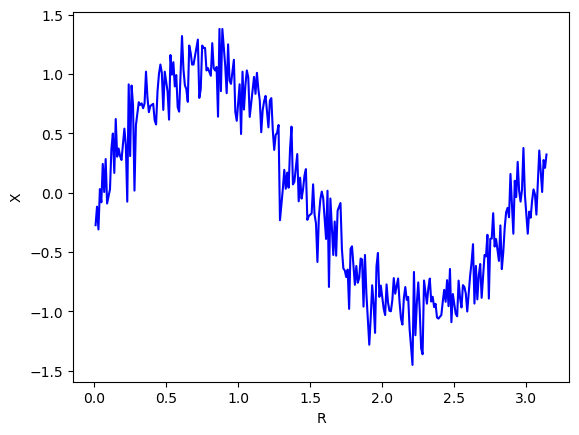

In [14]:
#Your code Here
#Plot your Training Data using matplotlib

# Plot the data points
plt.plot(x_train, y_train, c='blue')
# Set the y-axis label
plt.ylabel('X')
# Set the x-axis label
plt.xlabel('R')
plt.show()

##### Expected Output


![Model Equations](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/O2.png?raw=true)


 ### Fit Linear Regression Model (Training data)

 As our linear Model was
 
![Cost Funtion](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/Cost%20funtion1.png?raw=true
)

And using derivatives we transformed our model into 2 simultaneous equations

![Model Equations](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/Linear%20Model%20Eqs.png?raw=true)


Then converted it in matrix form

![Model Equations](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/Linear%20Model.png?raw=true)



NOTE :  Now you are required to compute values wihtout using foor loop on tarining data
- HINT : Use numpy library for this purpose 

In [17]:
#Your code Here
#For loop is not recommended in these cases, 
#use numpy functions to calculate the values of above variables in one line of code.
#Such as x.shape for number of rows, sum() for sum of all elements in x
#np.dot() or multiply suntion for square of x 


n = x_train.shape[0]
sum_of_x = np.sum(x_train)
sum_of_xx = np.sum(np.dot(x_train, x_train))

m = y_train.shape[0]
sum_of_y = np.sum(y_train)
sum_of_xy = np.sum(np.dot(x_train, y_train))

matrix_A = np.array([[n, sum_of_x],
     [sum_of_x, sum_of_xx]])
matrix_B = np.array([[sum_of_y],
     [sum_of_xy]])

print('Matrix A:\n\n', matrix_A, end='\n\n')

print('Matrix B:\n\n', matrix_B)

Matrix A:

 [[283.     444.95  ]
 [444.95   932.7465]]

Matrix B:

 [[   1.39087  ]
 [-126.6414295]]


Expected output

![Linear Model MAtrixes](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/Matrixs%20Linear.png?raw=true)


#### Compute Valus of Both Θ`s


In [18]:
#Your code Here
#Calculate the values of 0_node and 0_1 using Matrix Multiplication
#Hint: Use X = A^-1 * B to calculate the values of 0_node and 0_1

inverse_A = np.linalg.inv(matrix_A)
X = np.dot(inverse_A, matrix_B)
Theeta_00  = X[0][0]
Theeta_10 = X[1][0]
matrix_X = np.array([[Theeta_00], 
            [Theeta_10]])

print('Matrix X for the linear model:\n')
print(matrix_X) 

Matrix X for the linear model:

[[ 0.8736061 ]
 [-0.55251074]]


Expected Output

![Linear Model MAtrixes](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/Matrixs%20LinearT.png?raw=true)


### Run Predictions (Testing data)

In [19]:
# Your code Here
# In order to calculate the pridicted values of y
# Use the formula y = 0_node + 0_1 * x
# _____DO NOT USE FOR LOOP_____
# instead Convert the column of test_x into numpy a 2 dimensional matrix
# then use matrix multiplication to calculate the predicted values of y

testData = pd.read_csv('testRegression.csv')
test_row = np.array(testData['X']).reshape(-1, 1)
test_y = np.array(testData['R'])
onesArray = np.ones(testData.shape[0]).reshape(-1, 1)
test_x = np.concatenate((onesArray, test_row), axis=1)
predicted_y = np.dot(test_x, matrix_X)
print(predicted_y)

[[ 0.8736061 ]
 [ 0.81835502]
 [ 0.76310395]
 [ 0.70785287]
 [ 0.6526018 ]
 [ 0.59735072]
 [ 0.54209965]
 [ 0.48684858]
 [ 0.4315975 ]
 [ 0.37634643]
 [ 0.32109535]
 [ 0.26584428]
 [ 0.2105932 ]
 [ 0.15534213]
 [ 0.10009106]
 [ 0.04483998]
 [-0.01041109]
 [-0.06566217]
 [-0.12091324]
 [-0.17616432]
 [-0.23141539]
 [-0.28666646]
 [-0.34191754]
 [-0.39716861]
 [-0.45241969]
 [-0.50767076]
 [-0.56292184]
 [-0.61817291]
 [-0.67342398]
 [-0.72867506]
 [-0.78392613]
 [-0.83917721]]


### Mean Square Error

![Cost Funtion](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/Cost%20funtion1.png?raw=true
)

In [20]:
#Your code Here
#Using cost function calculate the cost of the model

predicted_linear = predicted_y.flatten()

# Calculating MSE
MSE = (np.mean(np.square(predicted_linear - test_y)))

print("Mean Squared Error for LINEAR MODEL is:", MSE)

Mean Squared Error for LINEAR MODEL is: 0.31593217204597746


Expected Output

![MSE of Linear](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/MSE%20Linear.png?raw=true
)

### Plot Data (Train and Test Data)

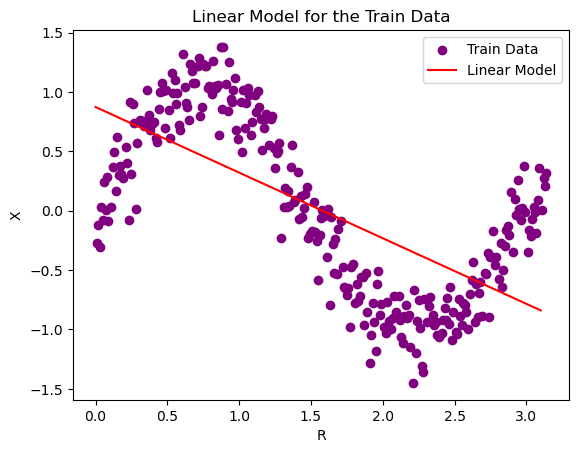

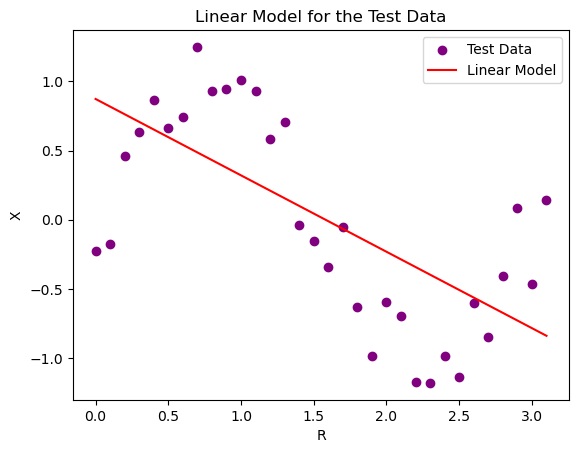

In [27]:
##Your code Here
#Plot the predicted values of y against the test_x

plt.scatter(x_train, y_train, marker='o', c='purple', label = 'Train Data')
plt.plot(test_row, predicted_y, c='red',label='Linear Model')
# Set the title
plt.title("Linear Model for the Train Data")
plt.legend()
# Set the y-axis label
plt.ylabel('X')
# Set the x-axis label
plt.xlabel('R')
plt.show()

plt.scatter(test_row, test_y, marker='o', c='purple', label = 'Test Data')
plt.plot(test_row, predicted_y, c='red',label='Linear Model')
# Set the title
plt.title("Linear Model for the Test Data")
plt.legend()
# Set the y-axis label
plt.ylabel('X')
# Set the x-axis label
plt.xlabel('R')
plt.show()


### Expected Outputs for Linear Model

![Training Data Plot](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/Linear%20O.png?raw=true)

![Test Data Plot](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/Linear%20O%20test.png?raw=true)


## Now Fit The Quadratic Model

 As our Quadratic Model was
 
![Cost Funtion for quadratic ](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/Cost%20funtion2.png?raw=true
)

And using derivatives we transformed our model into 3 simultaneous equations

![Model Equations of quadratic](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/Quad%20Model%20Eqs.png?raw=true)


Then converted it in matrix form

![Model Formula of Quadratic](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/Quad%20Model1.png?raw=true)



NOTE :  Now you are required to compute values wihtout using foor loop on tarining data
- HINT : Use numpy library for this purpose 

In [28]:
#Your code Here
#For loop is not recommended in these cases, 
#use numpy functions to calculate the values of above variables in one line of code.
#Such as x.shape for number of rows, sum() for sum of all elements in x
#np.dot() or multiply suntion for square of x 



sum_of_3x = np.sum(np.power(x_train, 3))
sum_of_4x = np.sum(np.power(x_train, 4))

sum_of_x2y = np.sum(np.dot(np.square(x_train), y_train))

matrix_A2 = np.array([[n, sum_of_x, sum_of_xx],
     [sum_x, sum_of_xx, sum_of_3x],
      [sum_of_xx, sum_of_3x, sum_of_4x]])
matrix_B2 = np.array([[sum_of_y],
     [sum_of_xy],
     [sum_of_x2y]])

print('Matrix A:\n\n', matrix_A2, end='\n\n')

print('Matrix B:\n\n', matrix_B2)


Matrix A:

 [[ 283.          444.95        932.7465    ]
 [ 444.95        932.7465     2199.781025  ]
 [ 932.7465     2199.781025   5533.85257677]]

Matrix B:

 [[   1.39087   ]
 [-126.6414295 ]
 [-378.87568955]]


Expected Output

![Quadratic Model Matrixes](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/Matrixs%20Quad1.png?raw=true)

#### Compute Valus Of Three Θ`s


In [29]:
#Your code Here
#Calculate the values of 0_node and 0_1 using Matrix Multiplication
#Hint: Use X = A^-1 * B to calculate the values of 0_node , 0_1 and 0_2

inverse_A2 = np.linalg.inv(matrix_A2)
X1 = np.dot(inverse_A2, matrix_B2)
Theeta_0  = X1[0][0]
Theeta_1 = X1[1][0]
Theeta_2 = X1[2][0]
matrix_X1 = np.array([[Theeta_0], 
            [Theeta_1],
            [Theeta_2]])

print('Matrix X for the Quadratic model:\n')
print(matrix_X1)

Matrix X for the Quadratic model:

[[ 1.10611454]
 [-0.99606599]
 [ 0.14104585]]


Expected Output

![Quadratic Model MAtrixes](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/Matrixs%20Quad.png?raw=true)


### Run Predictions (Testing data)

In [31]:
# Your code Here
# In order to calculate the pridicted values of y
# Use the formula y = 0_node + 0_1 * x
# _____DO NOT USE FOR LOOP_____
# instead Convert the column of test_x into numpy a 2 dimensional matrix
# then use matrix multiplication to calculate the predicted values of y

test_row2 = np.power(test_row, 2)
test_x1 = np.concatenate((onesArray, test_row, test_row2), axis=1)
predicted_y1 = np.dot(test_x1, matrix_X1)
print(predicted_y1)

[[ 1.10611454]
 [ 1.0079184 ]
 [ 0.91254317]
 [ 0.81998887]
 [ 0.73025548]
 [ 0.643343  ]
 [ 0.55925145]
 [ 0.47798081]
 [ 0.39953109]
 [ 0.32390228]
 [ 0.25109439]
 [ 0.18110742]
 [ 0.11394137]
 [ 0.04959623]
 [-0.01192799]
 [-0.0706313 ]
 [-0.12651368]
 [-0.17957515]
 [-0.22981571]
 [-0.27723534]
 [-0.32183406]
 [-0.36361187]
 [-0.40256875]
 [-0.43870472]
 [-0.47201977]
 [-0.50251391]
 [-0.53018713]
 [-0.55503943]
 [-0.57707081]
 [-0.59628128]
 [-0.61267083]
 [-0.62623946]]


### Mean Square Error

![Cost Funtion](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/Cost%20funtion2.png?raw=true
)

In [34]:
#Your code Here
#Using cost function calculate the cost of the model

predicted2_linear = predicted_y1.flatten()

# Calculating the MSE
MSE_1 = (np.mean(np.square(predicted2_linear - test_y)))

print("Mean Squared Error For QUADRATIC MODEL is::  ", MSE_1)

Mean Squared Error For QUADRATIC MODEL is::   0.32604179594962895


Expected Output

![MSE of Quadratic](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/MSE%20Quad.png?raw=true
)

### Plot Data (Train and Test Data)

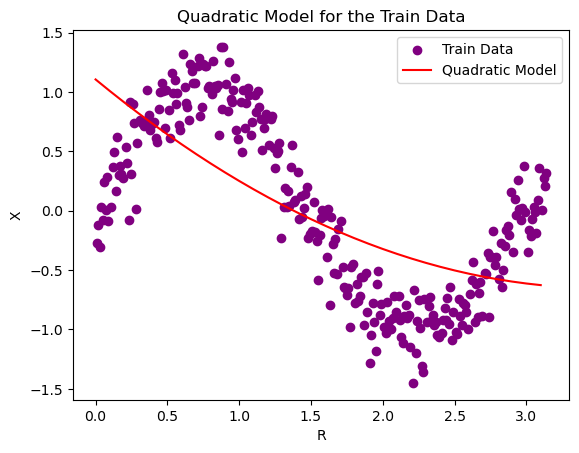

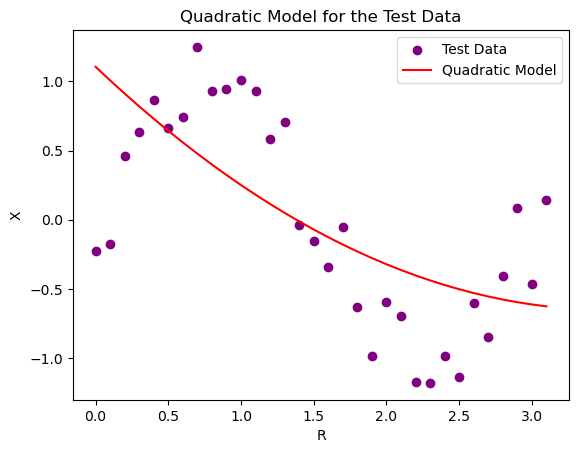

In [35]:
##Your code Here
#Plot the predicted values of y against the test_x

plt.scatter(x_train, y_train, marker='o', c='purple', label = 'Train Data')
plt.plot(test_row, predicted_y1, c='red',label='Quadratic Model')

plt.title("Quadratic Model for the Train Data")
plt.legend()
# Set the y-axis label
plt.ylabel('X')
# Set the x-axis label
plt.xlabel('R')
plt.show()


plt.scatter(test_row, test_y, marker='o', c='purple', label = 'Test Data')
plt.plot(test_row, predicted_y1, c='red',label='Quadratic Model')

plt.title("Quadratic Model for the Test Data")
plt.legend()
# Set the y-axis label
plt.ylabel('X')
# Set the x-axis label
plt.xlabel('R')
plt.show()

### Expected Outputs for Quadratic Model

![Training Data Plot](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/Quad%20O.png?raw=true)

![Test Data Plot](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/Quad%20O%20tets.png?raw=true)


## Now Fit The Cubic Model

Cubic Model in matrix form

![Model Formula of Quadratic](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/Cubic%20Model.png?raw=true)



NOTE :  Now you are required to compute values wihtout using foor loop on tarining data
- HINT : Use numpy library for this purpose 

In [36]:
#Your code Here
#For loop is not recommended in these cases, 
#use numpy functions to calculate the values of above variables in one line of code.
#Such as x.shape for number of rows, sum() for sum of all elements in x
#np.dot() or multiply suntion for square of x 



sum_of_5x = np.sum(np.power(x_train, 5))
sum_of_6x = np.sum(np.power(x_train, 6))
sum_of_x3y = np.sum(np.dot(np.power(x_train,3), y_train))
matrix_A3 = np.array([[n, sum_of_x, sum_of_xx, sum_of_3x],
     [sum_x, sum_of_xx, sum_of_3x, sum_of_4x],
      [sum_of_xx, sum_of_3x, sum_of_4x, sum_of_5x],
      [sum_of_3x, sum_of_4x, sum_of_5x, sum_of_6x]])
matrix_B3 = np.array([[sum_of_y],
     [sum_of_xy],
     [sum_of_x2y],
     [sum_of_x3y]])

print('Matrix A:\n\n', matrix_A3, end='\n\n')

print('Matrix B:\n\n', matrix_B3)


Matrix A:

 [[  283.           444.95         932.7465      2199.781025  ]
 [  444.95         932.7465      2199.781025    5533.85257677]
 [  932.7465      2199.781025    5533.85257677 14501.33829628]
 [ 2199.781025    5533.85257677 14501.33829628 39086.48841058]]

Matrix B:

 [[   1.39087   ]
 [-126.6414295 ]
 [-378.87568955]
 [-952.32410353]]


Expected Output

![Cubic Model Matrixes](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/Matrixs%20Cubic1.png?raw=true)

#### Compute Valus Of Four Θ`s


In [37]:
#Your code Here
#Calculate the values of 0_node and 0_1 using Matrix Multiplication
#Hint: Use X = A^-1 * B to calculate the values of 0_node , 0_1 ,0_2 and 0_3

inverse_A3 = np.linalg.inv(matrix_A3)
mat_X2 = np.dot(inverse_A3, matrix_B3)
Th_00  = mat_X2[0][0]
Th_10 = mat_X2[1][0]
Th_20 = mat_X2[2][0]
Th_30 = mat_X2[3][0]
matrix_X2 = np.array([[Th_00], 
            [Th_10],
            [Th_20],
            [Th_30]])

print('Matrix X for the cubic model :\n')
print(matrix_X2) 

Matrix X for the cubic model :

[[-0.18862637]
 [ 3.94071895]
 [-3.78251095]
 [ 0.83166145]]


Expected Output

![Cubic Model MAtrixes](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/Matrixs%20Cubic.png?raw=true)


### Run Predictions (Testing data)

In [39]:
# Your code Here
# In order to calculate the pridicted values of y
# Use the formula y = 0_node + 0_1 * x
# _____DO NOT USE FOR LOOP_____
# instead Convert the column of test_x into numpy a 2 dimensional matrix
# then use matrix multiplication to calculate the predicted values of y

test_row3 = np.power(test_row, 3)
test_x2 = np.concatenate((onesArray, test_row, test_row2, test_row3), axis=1)
predicted_y2 = np.dot(test_x2, matrix_X2)
print(predicted_y2)

[[-0.18862637]
 [ 0.16845208]
 [ 0.45487027]
 [ 0.67561819]
 [ 0.83568579]
 [ 0.94006305]
 [ 0.99373993]
 [ 1.00170641]
 [ 0.96895245]
 [ 0.90046802]
 [ 0.80124308]
 [ 0.67626762]
 [ 0.53053159]
 [ 0.36902497]
 [ 0.19673773]
 [ 0.01865982]
 [-0.16021877]
 [-0.33490808]
 [-0.50041814]
 [-0.65175898]
 [-0.78394064]
 [-0.89197314]
 [-0.97086652]
 [-1.0156308 ]
 [-1.02127602]
 [-0.98281221]
 [-0.89524941]
 [-0.75359763]
 [-0.55286692]
 [-0.2880673 ]
 [ 0.04579119]
 [ 0.45369852]]


### Mean Square Error

In [40]:
#Your code Here
#Using cost function calculate the cost of the model

predicted3_linear = predicted_y2.flatten()

# Calculating MSE
MSE_2 = (np.mean(np.square(predicted3_linear - test_y)))

# Print the cost function
print("Mean Squared Error::  ", MSE_2)

Mean Squared Error::   0.051542057690953234


Expected Output

![MSE of Cubic](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/MSE%20Cubic.png?raw=true
)

### Plot Data (Train and Test Data)

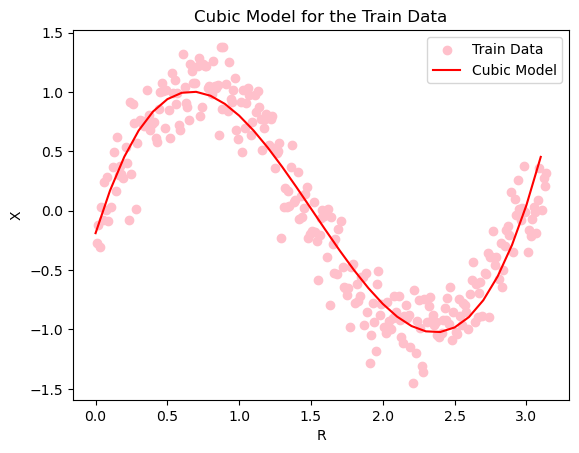

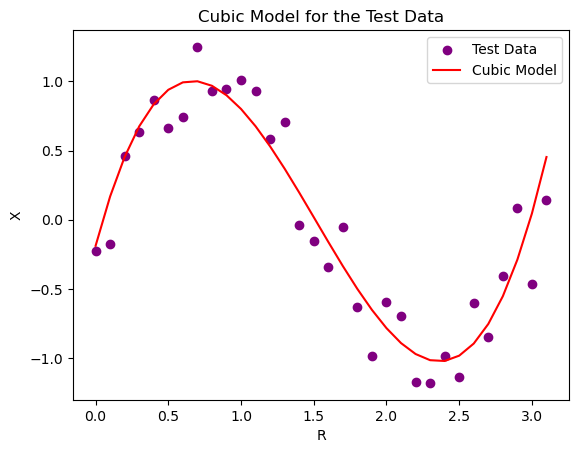

In [41]:
##Your code Here
#Plot the predicted values of y against the test_x

plt.scatter(x_train, y_train, marker='o', c='pink', label = 'Train Data')
plt.plot(test_row, predicted_y2, c='red',label='Cubic Model')

plt.title("Cubic Model for the Train Data")
plt.legend()
# Set the y-axis label
plt.ylabel('X')
# Set the x-axis label
plt.xlabel('R')
plt.show()


plt.scatter(test_row, test_y, marker='o', c='purple', label = 'Test Data')
plt.plot(test_row, predicted_y2, c='red',label='Cubic Model')

plt.title("Cubic Model for the Test Data")
plt.legend()
# Set the y-axis label
plt.ylabel('X')
# Set the x-axis label
plt.xlabel('R')
plt.show()

### Expected Outputs for Cubic Model

![Training Data Plot](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/Cubic%20O.png?raw=true)

![Test Data Plot](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/Cubic%20O%20test.png?raw=true)


### Now You Are Required To Fit Your 4 , 5 and 6 degree Models Step By Step As You Did Before

## Now Fit The 4 degree Model

Matrix A:
 [[2.83000000e+02 4.44950000e+02 9.32746500e+02 2.19978103e+03
  5.53385258e+03]
 [4.44950000e+02 9.32746500e+02 2.19978103e+03 5.53385258e+03
  1.45013383e+04]
 [9.32746500e+02 2.19978103e+03 5.53385258e+03 1.45013383e+04
  3.90864884e+04]
 [2.19978103e+03 5.53385258e+03 1.45013383e+04 3.90864884e+04
  1.07548336e+05]
 [5.53385258e+03 1.45013383e+04 3.90864884e+04 1.07548336e+05
  3.00624107e+05]]
Matrix B:
 [[ 1.39087000e+00]
 [-1.26641430e+02]
 [-3.78875690e+02]
 [-9.52324104e+02]
 [-2.30897053e+03]]

Matrix X for the 4 Degree model:
[[-0.40789474]
 [ 5.3320982 ]
 [-5.77179206]
 [ 1.81519401]
 [-0.15632916]]
[[-0.40789474]
 [ 0.06939672]
 [ 0.44192464]
 [ 0.7200174 ]
 [ 0.9136282 ]
 [ 1.03233502]
 [ 1.08534068]
 [ 1.0814728 ]
 [ 1.02918381]
 [ 0.93655094]
 [ 0.81127625]
 [ 0.66068659]
 [ 0.49173364]
 [ 0.31099387]
 [ 0.12466857]
 [-0.06141615]
 [-0.2418094 ]
 [-0.41143544]
 [-0.56559375]
 [-0.69995899]
 [-0.81058102]
 [-0.89388486]
 [-0.94667076]
 [-0.96611413]
 [-0.949765

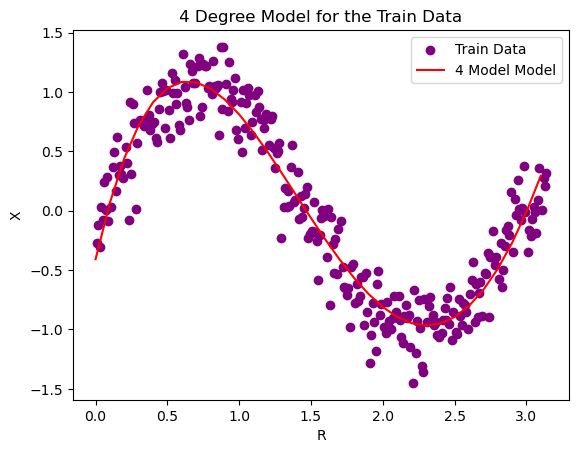

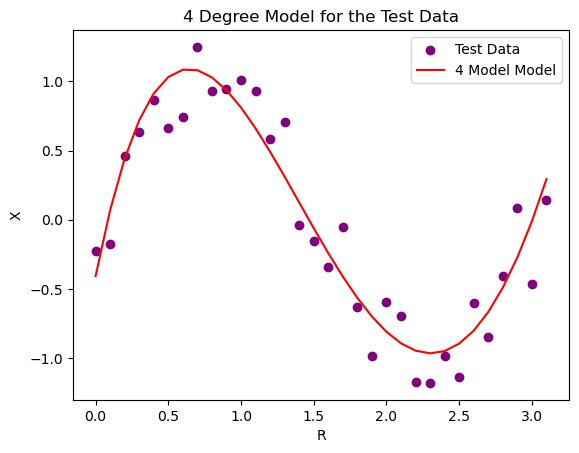

In [42]:
#Your code Here

#Your code Here

sum_of_7x = np.sum(np.power(x_train, 7))
sum_of_8x = np.sum(np.power(x_train, 8))
sum_of_x4y = np.sum(np.dot(np.power(x_train,4), y_train))
matrix_A4 = np.array([[n, sum_of_x, sum_of_xx, sum_of_3x, sum_of_4x],
     [sum_of_x, sum_of_xx, sum_of_3x, sum_of_4x, sum_of_5x],
      [sum_of_xx, sum_of_3x, sum_of_4x, sum_of_5x, sum_of_6x],
      [sum_of_3x, sum_of_4x, sum_of_5x, sum_of_6x, sum_of_7x],
       [sum_of_4x, sum_of_5x, sum_of_6x, sum_of_7x, sum_of_8x]])
matrix_B4 = np.array([[sum_of_y],
     [sum_of_xy],
     [sum_of_x2y],
     [sum_of_x3y],
     [sum_of_x4y]])

print('Matrix A:\n', matrix_A4)

print('Matrix B:\n', matrix_B4)

inverse_A4 = np.linalg.inv(matrix_A4)
mat_X3 = np.dot(inverse_A4, matrix_B4)
Tht_00  = mat_X3[0][0]
Tht_10 = mat_X3[1][0]
Tht_20 = mat_X3[2][0]
Tht_30 = mat_X3[3][0]
Tht_40 = mat_X3[4][0]
matrix_X3 = np.array([[Tht_00], 
            [Tht_10],
            [Tht_20],
            [Tht_30],
            [Tht_40]])

print('\nMatrix X for the 4 Degree model:')
print(matrix_X3) 

test_row4 = np.power(test_row, 4)
test_x3 = np.concatenate((onesArray, test_row, test_row2, test_row3, test_row4), axis=1)
predicted_y3 = np.dot(test_x3, matrix_X3)
print(predicted_y3)

predicted4_linear = predicted_y3.flatten()
# Calculate the MSE
MSE_3 = (np.mean(np.square(predicted4_linear - test_y)))

print("\nMean Squared Error:", MSE_3)

plt.scatter(x_train, y_train, marker='o', c='purple', label = 'Train Data')
plt.plot(test_row, predicted_y3, c='red',label='4 Model Model')

plt.title("4 Degree Model for the Train Data")
plt.legend()
# Set the y-axis label
plt.ylabel('X')
# Set the x-axis label
plt.xlabel('R')
plt.show()


plt.scatter(test_row, test_y, marker='o', c='purple', label = 'Test Data')
plt.plot(test_row, predicted_y3, c='red',label='4 Model Model')

plt.title("4 Degree Model for the Test Data")
plt.legend()
# Set the y-axis label
plt.ylabel('X')
# Set the x-axis label
plt.xlabel('R')
plt.show()






## Now Fit The 5 degree Model

Matrix A:
 [[2.83000000e+02 4.44950000e+02 9.32746500e+02 2.19978103e+03
  5.53385258e+03 1.45013383e+04]
 [4.44950000e+02 9.32746500e+02 2.19978103e+03 5.53385258e+03
  1.45013383e+04 3.90864884e+04]
 [9.32746500e+02 2.19978103e+03 5.53385258e+03 1.45013383e+04
  3.90864884e+04 1.07548336e+05]
 [2.19978103e+03 5.53385258e+03 1.45013383e+04 3.90864884e+04
  1.07548336e+05 3.00624107e+05]
 [5.53385258e+03 1.45013383e+04 3.90864884e+04 1.07548336e+05
  3.00624107e+05 8.50829605e+05]
 [1.45013383e+04 3.90864884e+04 1.07548336e+05 3.00624107e+05
  8.50829605e+05 2.43237118e+06]]
Matrix B:
 [[ 1.39087000e+00]
 [-1.26641430e+02]
 [-3.78875690e+02]
 [-9.52324104e+02]
 [-2.30897053e+03]
 [-5.57500637e+03]]

Matrix X for the 5 Degree model:
[[-0.15135453]
 [ 2.89713972]
 [-0.36242335]
 [-2.76674175]
 [ 1.48161173]
 [-0.20822932]]
[[-0.15135453]
 [ 0.13211454]
 [ 0.39374649]
 [ 0.62196231]
 [ 0.80823914]
 [ 0.94686034]
 [ 1.03466564]
 [ 1.07080128]
 [ 1.0564701 ]
 [ 0.99468168]
 [ 0.89000249]
 [

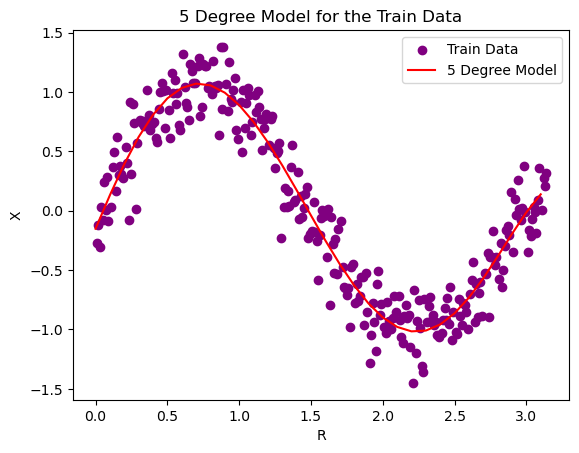

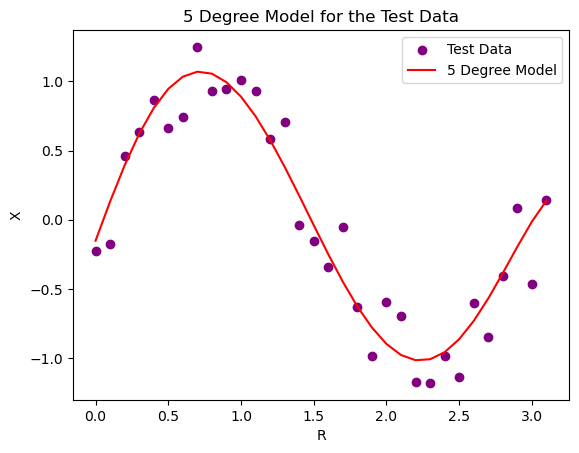

In [44]:
#Your code Here


sum_of_9x = np.sum(np.power(x_train, 9))
sum_of_10x = np.sum(np.power(x_train, 10))
sum_of_x5y = np.sum(np.dot(np.power(x_train,5), y_train))
matrix_A5 = np.array([[n, sum_of_x, sum_of_xx, sum_of_3x, sum_of_4x, sum_of_5x],
     [sum_of_x, sum_of_xx, sum_of_3x, sum_of_4x, sum_of_5x, sum_of_6x],
      [sum_of_xx, sum_of_3x, sum_of_4x, sum_of_5x, sum_of_6x, sum_of_7x],
      [sum_of_3x, sum_of_4x, sum_of_5x, sum_of_6x, sum_of_7x, sum_of_8x],
       [sum_of_4x, sum_of_5x, sum_of_6x, sum_of_7x, sum_of_8x, sum_of_9x],
        [sum_of_5x, sum_of_6x, sum_of_7x, sum_of_8x, sum_of_9x, sum_of_10x]])
matrix_B5 = np.array([[sum_of_y],
     [sum_of_xy],
     [sum_of_x2y],
     [sum_of_x3y],
     [sum_of_x4y],
     [sum_of_x5y]])

print('Matrix A:\n', matrix_A5)

print('Matrix B:\n', matrix_B5)

inverse_A5 = np.linalg.inv(matrix_A5)
mat_X4 = np.dot(inverse_A5, matrix_B5)
Thta_00  = mat_X4[0][0]
Thta_10 = mat_X4[1][0]
Thta_20 = mat_X4[2][0]
Thta_30 = mat_X4[3][0]
Thta_40 = mat_X4[4][0]
Thta_50 = mat_X4[5][0]
matrix_X4 = np.array([[Thta_00], 
            [Thta_10],
            [Thta_20],
            [Thta_30],
            [Thta_40],
            [Thta_50]])

print('\nMatrix X for the 5 Degree model:')
print(matrix_X4) 

test_row5 = np.power(test_row, 5)
test_x4 = np.concatenate((onesArray, test_row, test_row2, test_row3, test_row4, test_row5), axis=1)
predicted_y4 = np.dot(test_x4, matrix_X4)
print(predicted_y4)

predicted5_linear = predicted_y4.flatten()
# Calculate the MSE
MSE_4 = (np.mean(np.square(predicted5_linear - test_y)))

print("\nMean Squared Error:", MSE_4)

plt.scatter(x_train, y_train, marker='o', c='purple', label = 'Train Data')
plt.plot(test_row, predicted_y4, c='red',label='5 Degree Model')

plt.title("5 Degree Model for the Train Data")
plt.legend()
# Set the y-axis label
plt.ylabel('X')
# Set the x-axis label
plt.xlabel('R')
plt.show()


plt.scatter(test_row, test_y, marker='o', c='purple', label = 'Test Data')
plt.plot(test_row, predicted_y4, c='red',label='5 Degree Model')
plt.legend()
plt.title("5 Degree Model for the Test Data")
# Set the y-axis label
plt.ylabel('X')
# Set the x-axis label
plt.xlabel('R')
plt.show()



## Now Fit The 6 degree Model

Matrix A:
 [[2.83000000e+02 4.44950000e+02 9.32746500e+02 2.19978103e+03
  5.53385258e+03 1.45013383e+04 3.90864884e+04]
 [4.44950000e+02 9.32746500e+02 2.19978103e+03 5.53385258e+03
  1.45013383e+04 3.90864884e+04 1.07548336e+05]
 [9.32746500e+02 2.19978103e+03 5.53385258e+03 1.45013383e+04
  3.90864884e+04 1.07548336e+05 3.00624107e+05]
 [2.19978103e+03 5.53385258e+03 1.45013383e+04 3.90864884e+04
  1.07548336e+05 3.00624107e+05 8.50829605e+05]
 [5.53385258e+03 1.45013383e+04 3.90864884e+04 1.07548336e+05
  3.00624107e+05 8.50829605e+05 2.43237118e+06]
 [1.45013383e+04 3.90864884e+04 1.07548336e+05 3.00624107e+05
  8.50829605e+05 2.43237118e+06 7.01172536e+06]
 [3.90864884e+04 1.07548336e+05 3.00624107e+05 8.50829605e+05
  2.43237118e+06 7.01172536e+06 2.03540142e+07]]
Matrix B:
 [[ 1.39087000e+00]
 [-1.26641430e+02]
 [-3.78875690e+02]
 [-9.52324104e+02]
 [-2.30897053e+03]
 [-5.57500637e+03]
 [-1.35290159e+04]]

Matrix X for the 6 Degree model:
[[-0.12883598]
 [ 2.59932802]
 [ 0.5809

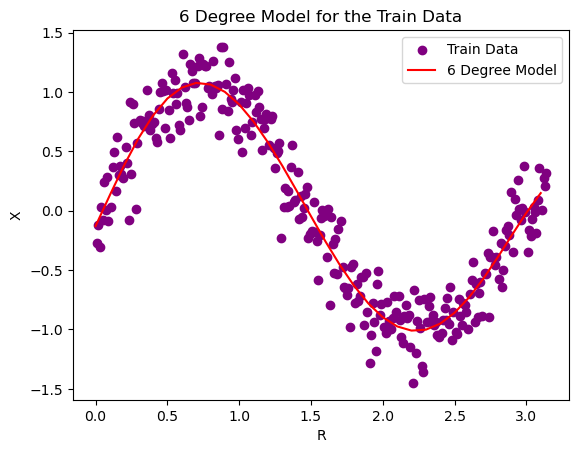

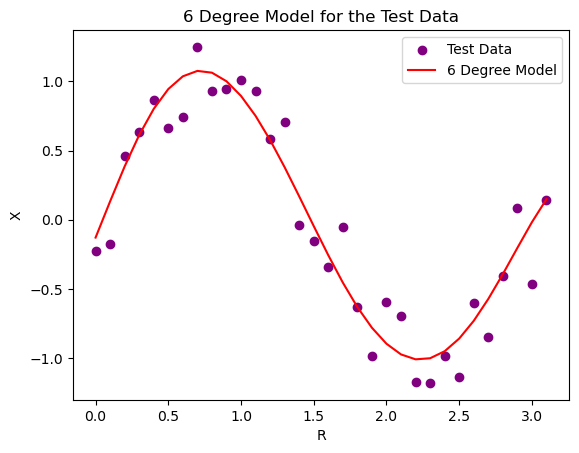

In [51]:
#Your code Here

sum_of_11x = np.sum(np.power(x_train, 11))
sum_of_12x = np.sum(np.power(x_train, 12))
sum_of_x6y = np.sum(np.dot(np.power(x_train,6), y_train))
matrix_A6 = np.array([[n, sum_of_x, sum_of_xx, sum_of_3x, sum_of_4x, sum_of_5x, sum_of_6x],
     [sum_of_x, sum_of_xx, sum_of_3x, sum_of_4x, sum_of_5x, sum_of_6x, sum_of_7x],
      [sum_of_xx, sum_of_3x, sum_of_4x, sum_of_5x, sum_of_6x, sum_of_7x, sum_of_8x],
      [sum_of_3x, sum_of_4x, sum_of_5x, sum_of_6x, sum_of_7x, sum_of_8x, sum_of_9x],
       [sum_of_4x, sum_of_5x, sum_of_6x, sum_of_7x, sum_of_8x, sum_of_9x, sum_of_10x],
        [sum_of_5x, sum_of_6x, sum_of_7x, sum_of_8x, sum_of_9x, sum_of_10x, sum_of_11x],
        [sum_of_6x, sum_of_7x, sum_of_8x, sum_of_9x, sum_of_10x, sum_of_11x, sum_of_12x]])
    
matrix_B6 = np.array([[sum_of_y],
     [sum_of_xy],
     [sum_of_x2y],
     [sum_of_x3y],
     [sum_of_x4y],
     [sum_of_x5y],
     [sum_of_x6y]])

print('Matrix A:\n', matrix_A6)

print('Matrix B:\n', matrix_B6)

inverse_A6 = np.linalg.inv(matrix_A6)
mat_X5 = np.dot(inverse_A6, matrix_B6)
Theta_00  = mat_X5[0][0]
Theta_10 = mat_X5[1][0]
Theta_20 = mat_X5[2][0]
Theta_30 = mat_X5[3][0]
Theta_40 = mat_X5[4][0]
Theta_50 = mat_X5[5][0]
Theta_60 = mat_X5[6][0]
mtrix_X5 = np.array([[Theta_00], 
            [Theta_10],
            [Theta_20],
            [Theta_30],
            [Theta_40],
            [Theta_50],
            [Theta_60]])

print('\nMatrix X for the 6 Degree model:')
print(mtrix_X5) 

test_row6 = np.power(test_row, 6)
test_x5 = np.concatenate((onesArray, test_row, test_row2, test_row3, test_row4, test_row5, test_row6), axis=1)
predicted_y5 = np.dot(test_x5, mat_X5)
print(predicted_y5)

predicted6_linear = predicted_y5.flatten()
# Calculate the MSE cost function
MSE_5 =  (np.mean(np.square(predicted6_linear - test_y)))

print("\nMean Squared Error:", MSE_5)

plt.scatter(x_train, y_train, marker='o', c='purple', label = 'Train Data')
plt.plot(test_row, predicted_y5, c='red',label='6 Degree Model')
# Set the title
plt.title("6 Degree Model for the Train Data")
plt.legend()
# Set the y-axis label
plt.ylabel('X')
# Set the x-axis label
plt.xlabel('R')
plt.show()


plt.scatter(test_row, test_y, marker='o', c='purple', label = 'Test Data')
plt.plot(test_row, predicted_y5, c='red',label='6 Degree Model')
plt.legend()
plt.title("6 Degree Model for the Test Data")
# Set the y-axis label
plt.ylabel('X')
# Set the x-axis label
plt.xlabel('R')
plt.show()


### Comment on the results by comparing all of your models